In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
from scipy.stats import linregress

### Пункт 2 

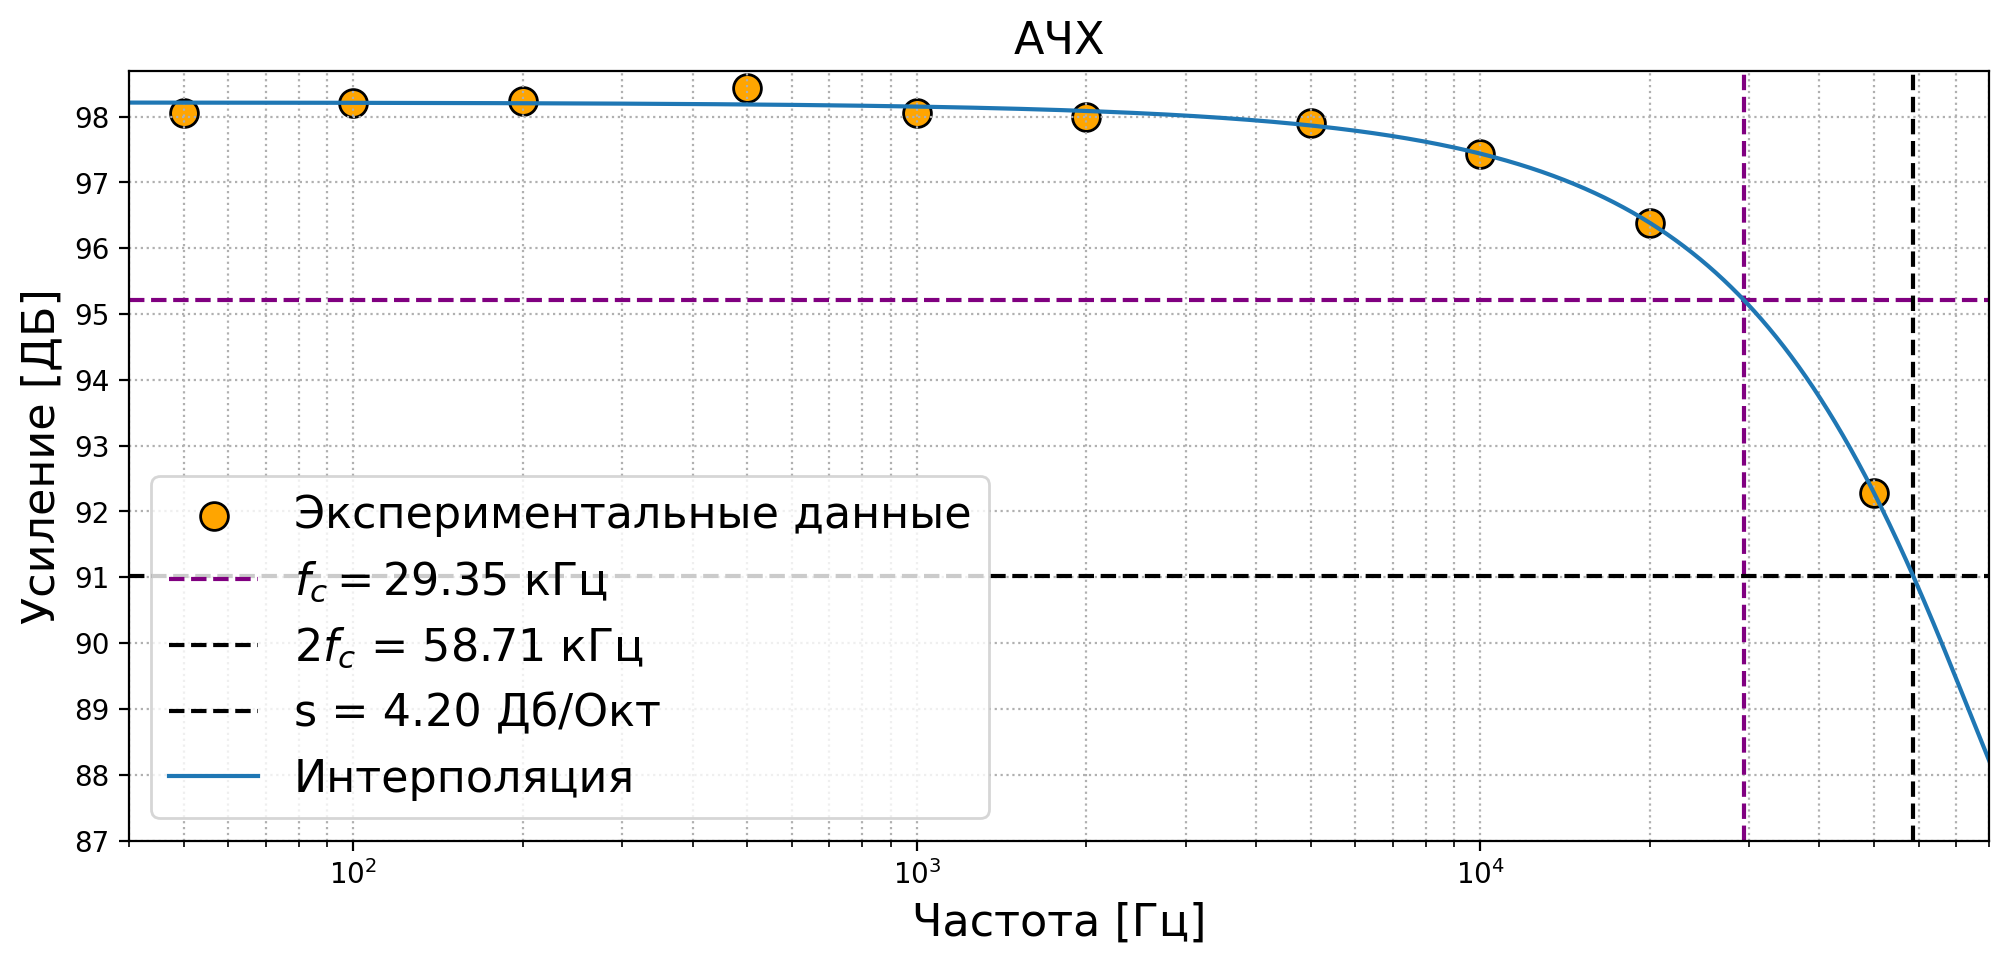

In [3]:
data = pd.read_csv("afr.csv")
att = 20 * np.log10(data.amp * 80 * 1e3 / 5.7)
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data.freq, att, s = 100, edgecolors='black', color = 'orange', label = 'Экспериментальные данные')
x_line = np.linspace(0, 1e4 * 10, 10000)
y_interp = UnivariateSpline(data.freq, att, s = 10)(x_line)

minus_3db_level_index = np.argmin(np.abs(np.max(y_interp) - y_interp - 3))
plt.axvline(x_line[minus_3db_level_index],
            color = 'purple',
            label = f'$f_с = {x_line[minus_3db_level_index] / 1000:.2f}$ кГц',
            linestyle = '--')
plt.axhline(y_interp[minus_3db_level_index],
            color = 'purple',
            linestyle = '--')
slope_index = np.argmin(np.abs(2 * x_line[minus_3db_level_index] - x_line))
plt.axvline(2 * x_line[minus_3db_level_index], 
            color = 'black', 
            linestyle = '--', 
            label = f'$2f_c$ = {2 * x_line[minus_3db_level_index] / 1e3:.2f} кГц')
plt.axhline(y_interp[slope_index], 
            color = 'black', 
            linestyle = '--', 
            label = f's = {y_interp[minus_3db_level_index] - y_interp[slope_index]:.2f} Дб/Окт')
plt.plot(x_line, y_interp, label = 'Интерполяция')
plt.xscale('log')
plt.ylabel("Усиление [ДБ]", fontsize = 16)
plt.xlabel("Частота [Гц]", fontsize = 16)
plt.title("АЧХ", fontsize = 16)
plt.yticks(np.arange(80, 100, 1))
plt.ylim(87, 98.7)
plt.grid(ls = ':', which = 'both')
plt.xlim(40, 8 * 1e4)
plt.legend(fontsize = 16, loc = 'lower left')
plt.savefig("main.png")

### Пункт 8

In [4]:
data = pd.read_csv("8.csv")
data.head()

,freq,out
0,24.7,1.700
1,62.7,1.100
2,100.0,0.760
3,802.0,0.109
4,80.2,0.929


39.48948948948949
100.0


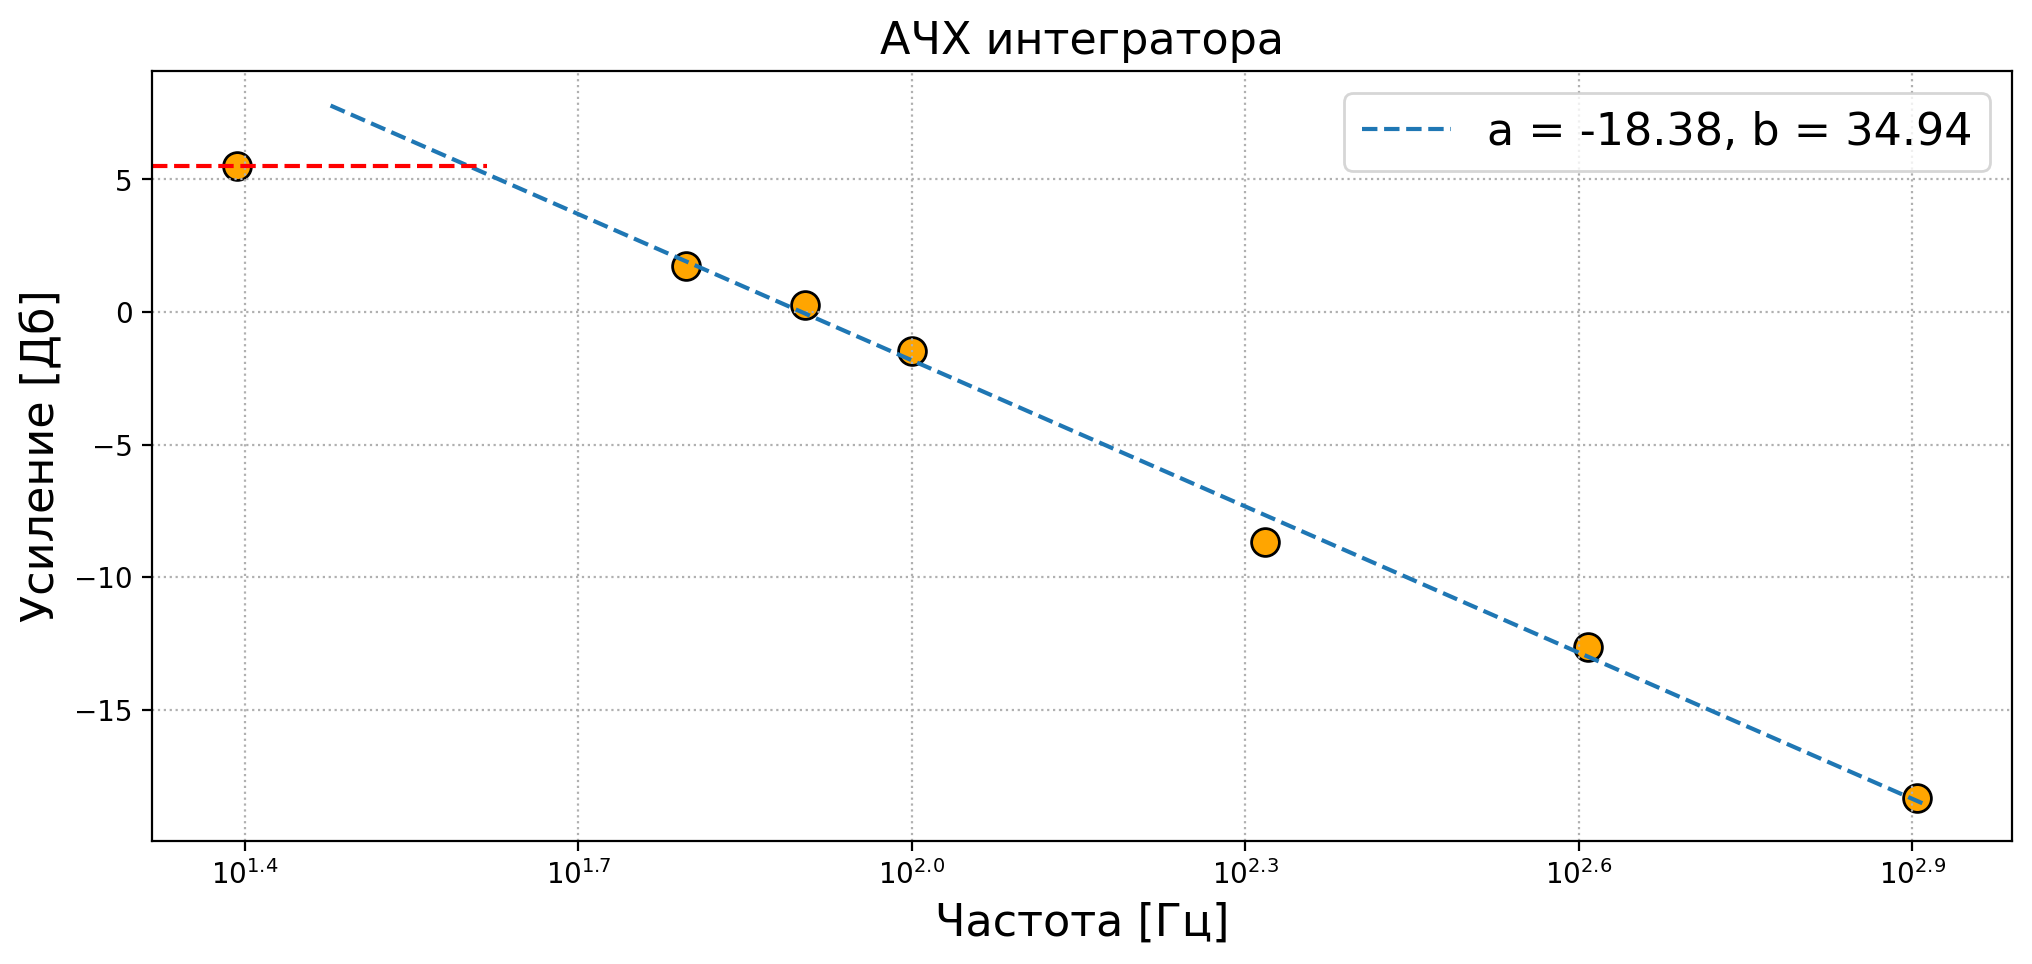

In [5]:
plt.figure(figsize = (12, 5), dpi = 200)
att = 20 * np.log10(data.out / 0.900)
plt.scatter(np.log10(data.freq), att, s = 100, edgecolors='black', color = 'orange')
plt.xlabel("Частота [Гц]", fontsize = 16)
plt.ylabel("Усиление [Дб]", fontsize = 16)
mask = data.freq > 30
x_tiks = np.arange(1.4, 3, 0.3)
plt.xticks(x_tiks)
ax = plt.gca()
ax.set_xticklabels([r"$10^{" + str(round(a, 2)) + "}$" for a in x_tiks])
plt.grid(ls = ":")
MNK = linregress(np.log10(data.freq[mask]), att[mask])
x_line = np.log10(np.linspace(30, 820, 1000))
plt.plot(x_line, MNK.slope * x_line + MNK.intercept, linestyle = '--', label = f'a = {MNK.slope:.2f}, b = {MNK.intercept:.2f}')
plt.legend(fontsize = 16)
plt.axhline(att[0], linestyle = '--', color = 'red', xmax = 0.18)
plt.title("АЧХ интегратора", fontsize = 16)
plt.savefig("integrator.png")
index_of_interception = np.argmin(np.abs(att[0] - MNK.slope * x_line - MNK.intercept))
print(np.power(10, x_line[index_of_interception]))
print(data.freq[2])

### Пункт 4

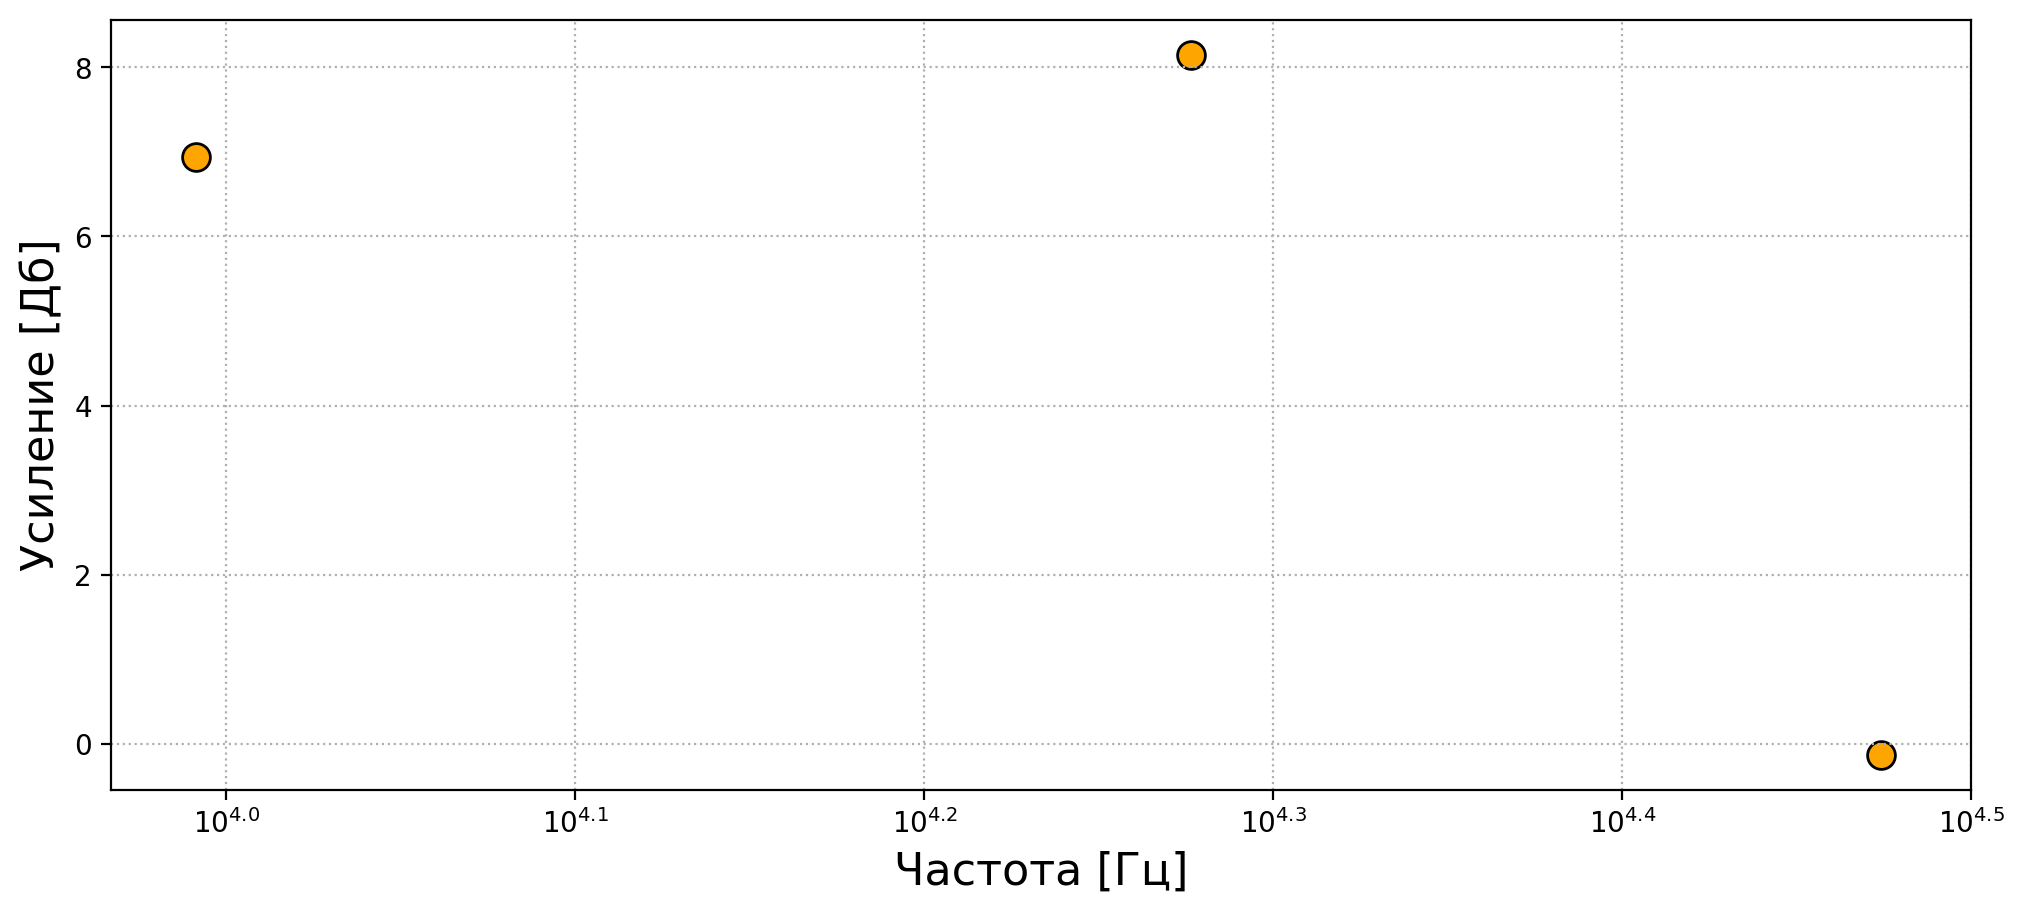

In [6]:
data = pd.read_csv("4.csv")
data.freq *= 1000
plt.figure(figsize = (12, 5), dpi = 200)
att = 20 * np.log10(data.out / 0.900)
plt.scatter(np.log10(data.freq), att, s = 100, edgecolors='black', color = 'orange')
plt.xlabel("Частота [Гц]", fontsize = 16)
plt.ylabel("Усиление [Дб]", fontsize = 16)
mask = data.freq > 30
x_tiks = np.arange(4, 4.6, 0.1)
plt.xticks(x_tiks)
ax = plt.gca()
ax.set_xticklabels([r"$10^{" + str(round(a, 2)) + "}$" for a in x_tiks])
plt.grid(ls = ":")

### Задача 2

[19.99668439-0.25128366j 19.992542  -0.37683095j 19.98674581-0.50227994j
 ...  0.95675795-0.28870784j  0.95675707-0.28867898j
  0.9567562 -0.28865013j]


(0.0, 27.0)

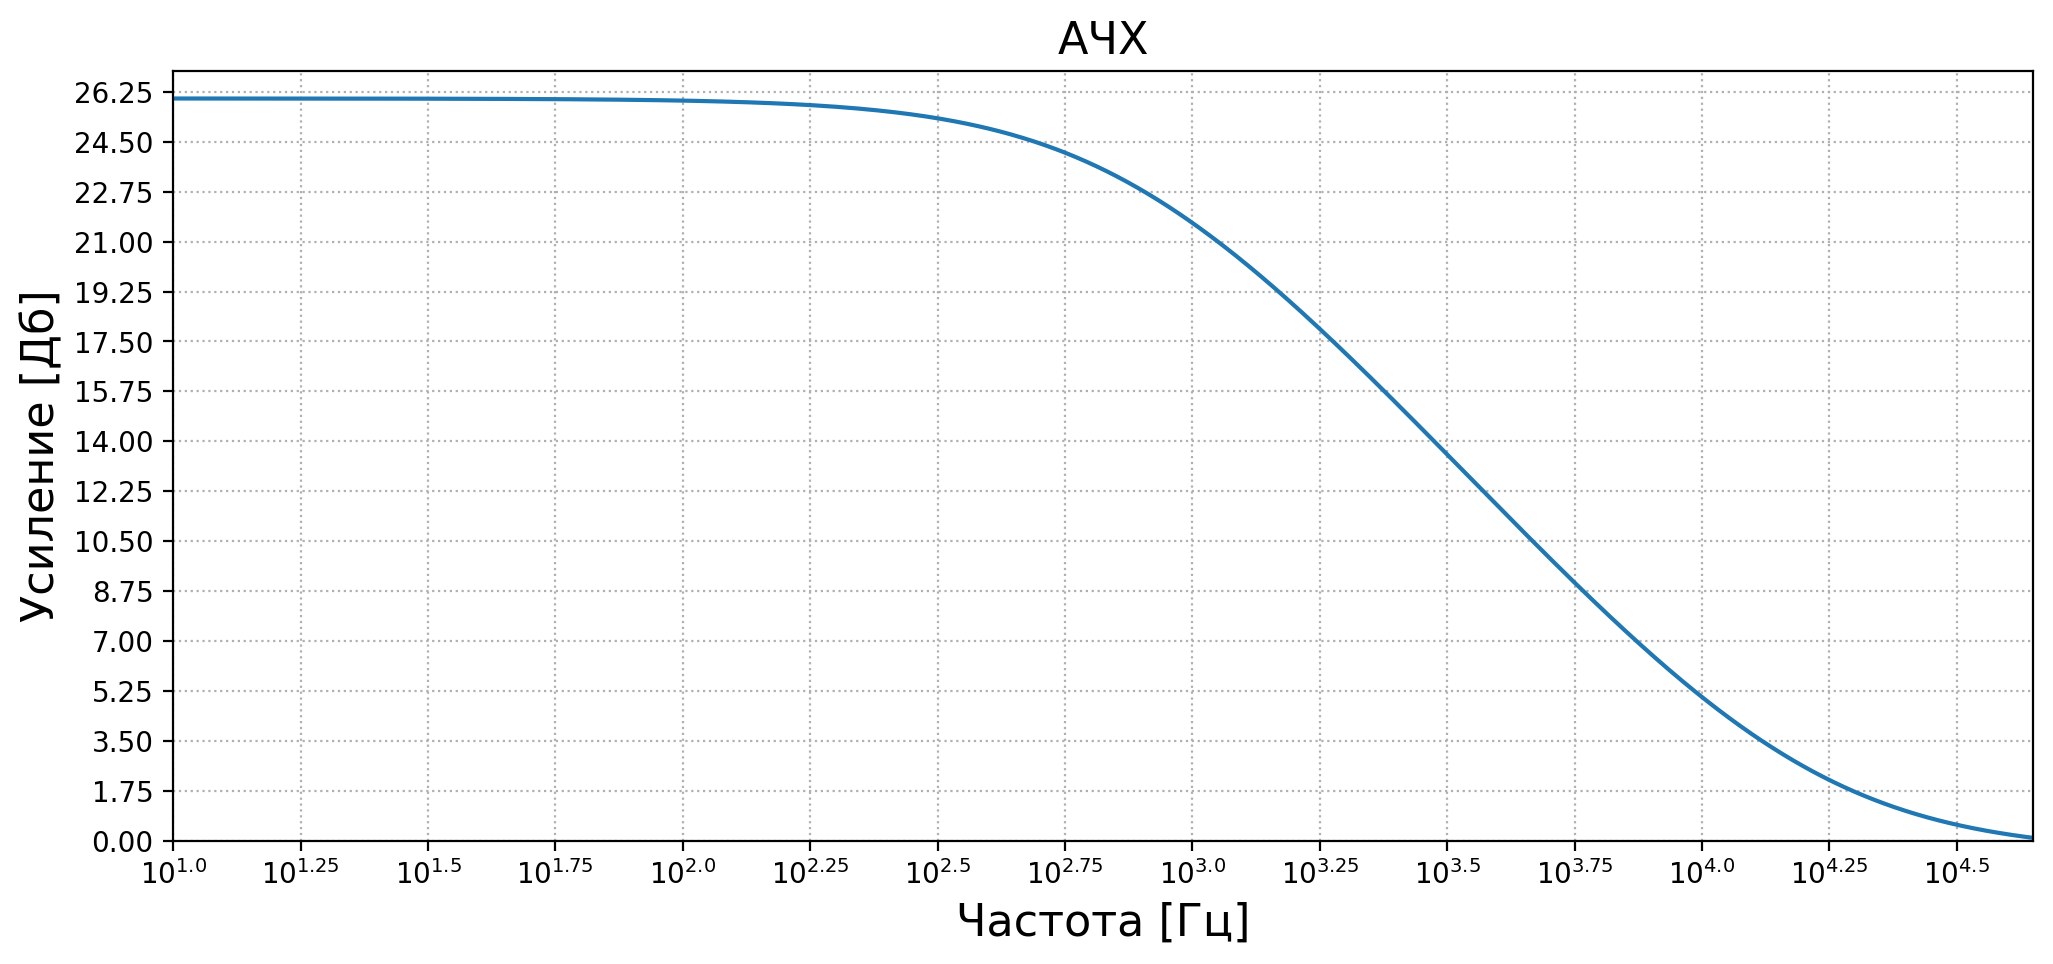

In [48]:
f = np.linspace(10, 50 * 1e3, 10000)
C = 1e-6

num = 200 + (20 / (2 * np.pi * f * C * 1j))
den = 210 + (1 / (2 * np.pi * f * C * 1j))
k = num / den
print(k)
k_db = 20 * np.log10(np.abs(k))
plt.figure(figsize=(12, 5), dpi = 200)
plt.plot(np.log10(f), k_db)
plt.title("АЧХ", fontsize = 16)
x_tiks = np.arange(1, 4.75, 0.25)
plt.xticks(x_tiks)
ax = plt.gca()
ax.set_xticklabels([r"$10^{" + str(round(a, 2)) + "}$" for a in x_tiks])
plt.grid(ls = ':')
plt.xlim(1, 4.65)
plt.xlabel("Частота [Гц]", fontsize = 16)
plt.ylabel("Усиление [Дб]", fontsize = 16)
plt.yticks(np.arange(0, 30, 1.75))
plt.ylim(0, 27)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_27962/1517648736.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel("Фаза [$\degree$]", fontsize = 16)


Text(0.5, 0, 'Частота [Гц]')

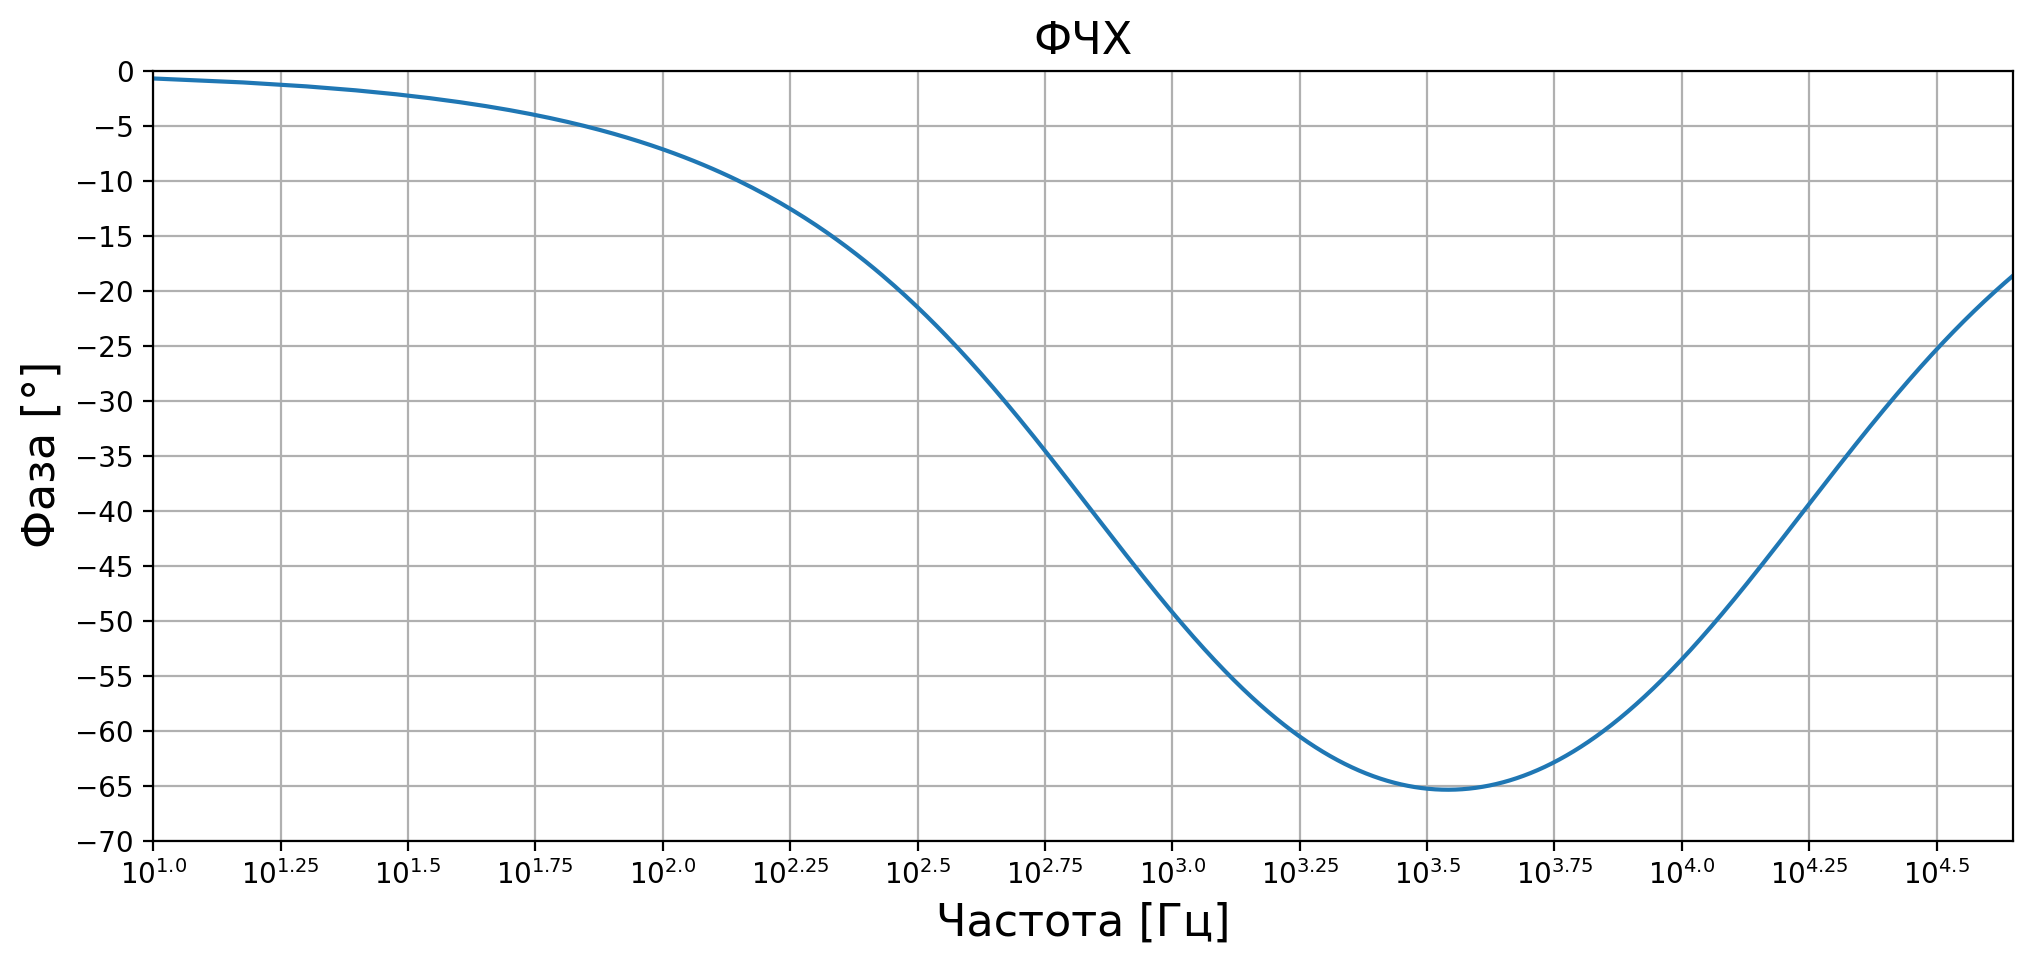

In [45]:
plt.figure(figsize=(12, 5), dpi = 200)
plt.plot(np.log10(f), np.angle(k) * 180 / np.pi)
x_tiks = np.arange(1, 10, 0.25)
plt.xticks(x_tiks)
ax = plt.gca()
plt.grid()

ax.set_xticklabels([r"$10^{" + str(round(a, 2)) + "}$" for a in x_tiks])
plt.title("ФЧХ", fontsize = 16)
plt.xlim(1, 4.65)
plt.yticks(np.arange(-70, 10, 5))
plt.ylim(-70, 0)
plt.ylabel("Фаза [$\degree$]", fontsize = 16)
plt.xlabel("Частота [Гц]", fontsize = 16)